In [4]:
import pandas as pd

In [5]:
hotels = pd.read_csv('data/hotels.csv')


In [107]:
# hotels[hotels['hotel_address'].str.match('.+am')]['hotel_address']

Series([], Name: hotel_address, dtype: object)

In [6]:
hotels['review_date'] = pd.to_datetime(hotels['review_date'])
hotels['review_date'].max()

Timestamp('2017-08-03 00:00:00')

In [17]:
hotels.head()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2016-02-19,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,2017-01-12,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,2016-10-18,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,2015-09-22,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,11,8,10.0,"[' Leisure trip ', ' Solo traveler ', ' Standa...",681 day,48.888697,2.394540
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,2016-03-05,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,20,10,9.6,"[' Business trip ', ' Couple ', ' Standard Dou...",516 day,52.385601,4.847060


In [46]:
tags_set = set()
tags_count = dict()
def unique_tags(elem):
    lst = list(elem.replace('[', '').replace(']','').replace('\'', '').split(', '))
    for elem in lst:
        tags_set.add(elem)
        if elem not in tags_count:
            tags_count[elem] = 1
        else:
            tags_count[elem] += 1
hotels['tags'].apply(unique_tags, args=tags_set)
# max_tag_count = 0
# for key, elem in tags_count.items():
#     if elem > max_tag_count:
#         max_tag_name = key
#         max_tag_count = elem
# max_tag_name
max_val = 0 
for key, value in tags_count.items():
    if 'night' in key and value > max_val:
        max_val = value
        max_night = key
max_night

' Stayed 1 night '

In [3]:
len(list(hotels['hotel_name'].unique()))

1492

In [11]:
num_cols = ['average_score', 'total_number_of_reviews', 'review_total_negative_word_counts', 'additional_number_of_scoring', 'total_number_of_reviews', 'review_total_positive_word_counts', 'total_number_of_reviews_reviewer_has_given']

cat_cols = ['lat'] 

# num_cols.remove('reviewer_score')
hotels = hotels.fillna(0)
# num_cols = ['total_number_of_reviews', 'review_total_negative_word_counts', ...]
# cat_cols = ['average_score', 'lat']
# hotels = hotels.drop(obj_cols, axis =1)
# hotels.info()
num_cols


['average_score',
 'total_number_of_reviews',
 'review_total_negative_word_counts',
 'additional_number_of_scoring',
 'total_number_of_reviews',
 'review_total_positive_word_counts',
 'total_number_of_reviews_reviewer_has_given']

In [5]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х - данные с информацией об отелях, у - целевая переменная (рейтинги отелей)  
X = hotels.drop(['reviewer_score'], axis = 1)  
y = hotels['reviewer_score'] 

In [55]:
# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  

In [60]:
y=y.astype('int')
from sklearn.feature_selection import chi2 # хи-квадрат

imp_cat = pd.Series(chi2(X[cat_cols], y)[0], index=cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

ValueError: could not convert string to float: 'Stratton Street Mayfair Westminster Borough London W1J 8LT United Kingdom'

<AxesSubplot:>

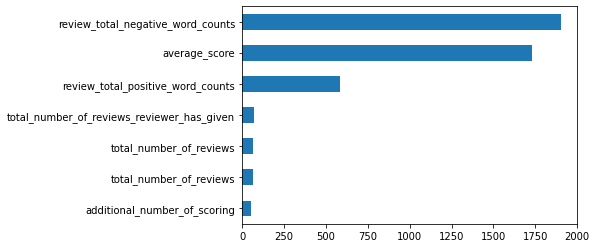

In [12]:
from sklearn.feature_selection import f_classif # anova

imp_num = pd.Series(f_classif(X[num_cols], y)[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')


In [45]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [46]:
# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
  
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)  


In [47]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений от фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.14132585046544824


Небольшой бонус:


In [48]:
# # убираем признаки которые еще не успели обработать, 
# # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
# object_columns = [s for s in hotels.columns if hotels[s].dtypes == 'object']
# hotels.drop(object_columns, axis = 1, inplace=True)

# # заполняем пропуски самым простым способом
# hotels = hotels.fillna(0)